# データ型とデータの行数、列数を確認する

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/test/test_cleaned2/test_33_cleaned.csv'
data_cleaned = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

print(data_cleaned.dtypes)

# データの行数と列数をプリントする
print(f"\nデータの行数: {data_cleaned.shape[0]}")
print(f"データの列数: {data_cleaned.shape[1]}")


ID             int64
市区町村コード        int64
最寄駅：距離（分）      int64
間取り           object
面積（㎡）          int64
建築年          float64
建物の構造         object
取引時点           int64
dtype: object

データの行数: 66
データの列数: 8


# 1. 異常値の確認をする

count      66.000000
mean     1997.181818
std        11.347530
min      1973.000000
25%      1990.250000
50%      1996.500000
75%      2004.000000
max      2018.000000
Name: 建築年, dtype: float64
異常値の下限: 1969.625
異常値の上限: 2024.625
異常値の数: 0


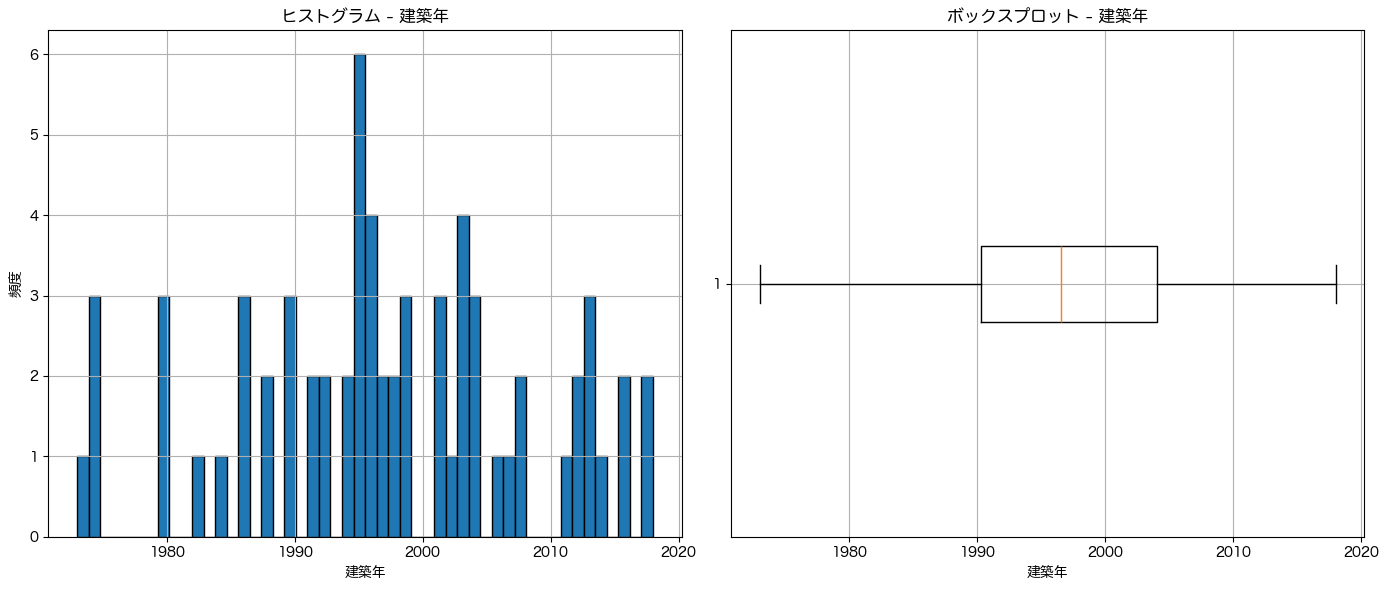

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/test/test_cleaned2/test_33_cleaned.csv'  # 正しいファイルパスの確認
data_cleaned = pd.read_csv(data_path)

# '面積（㎡）'列を数値型に変換（エラーを無視）
data_cleaned['建築年'] = pd.to_numeric(data_cleaned['建築年'], errors='coerce')

# 統計情報の確認
print(data_cleaned['建築年'].describe())

# 四分位範囲（IQR）を使用した異常値の検出
Q1 = data_cleaned['建築年'].quantile(0.25)
Q3 = data_cleaned['建築年'].quantile(0.75)
IQR = Q3 - Q1

# 異常値の閾値
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 異常値の検出
outliers = data_cleaned[(data_cleaned['建築年'] < lower_bound) | (data_cleaned['建築年'] > upper_bound)]

# 異常値の数を確認
num_outliers = len(outliers)

# 結果を表示
print(f"異常値の下限: {lower_bound}")
print(f"異常値の上限: {upper_bound}")
print(f"異常値の数: {num_outliers}")

import matplotlib.pyplot as plt

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# ヒストグラムの作成
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['建築年'], bins=50, edgecolor='k')
plt.title('ヒストグラム - 建築年')
plt.xlabel('建築年')
plt.ylabel('頻度')
plt.grid(True)

# ボックスプロットの作成
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['建築年'], vert=False)
plt.title('ボックスプロット - 建築年')
plt.xlabel('建築年')
plt.grid(True)

# プロットを表示
plt.tight_layout()
plt.show()


# 列内の異常値だけを削除して中央値で置き換える

ID             int64
市区町村コード        int64
最寄駅：距離（分）    float64
間取り           object
面積（㎡）          int64
建築年          float64
建物の構造         object
取引時点           int64
dtype: object

データの行数: 66
データの列数: 8

異常値をNaNに置き換えた後のデータの行数: 66
異常値をNaNに置き換えた後のデータの列数: 8
異常値処理後のデータを保存しました: /Users/hayakawakazue/Downloads/data/test/test_cleaned3/test_33_cleaned_最寄駅_面積（㎡）.csv
count    66.000000
mean     70.151515
std       9.155482
min      50.000000
25%      65.000000
50%      70.000000
75%      75.000000
max      90.000000
Name: 面積（㎡）, dtype: float64
異常値の下限: 50
異常値の上限: 90
異常値の数: 0


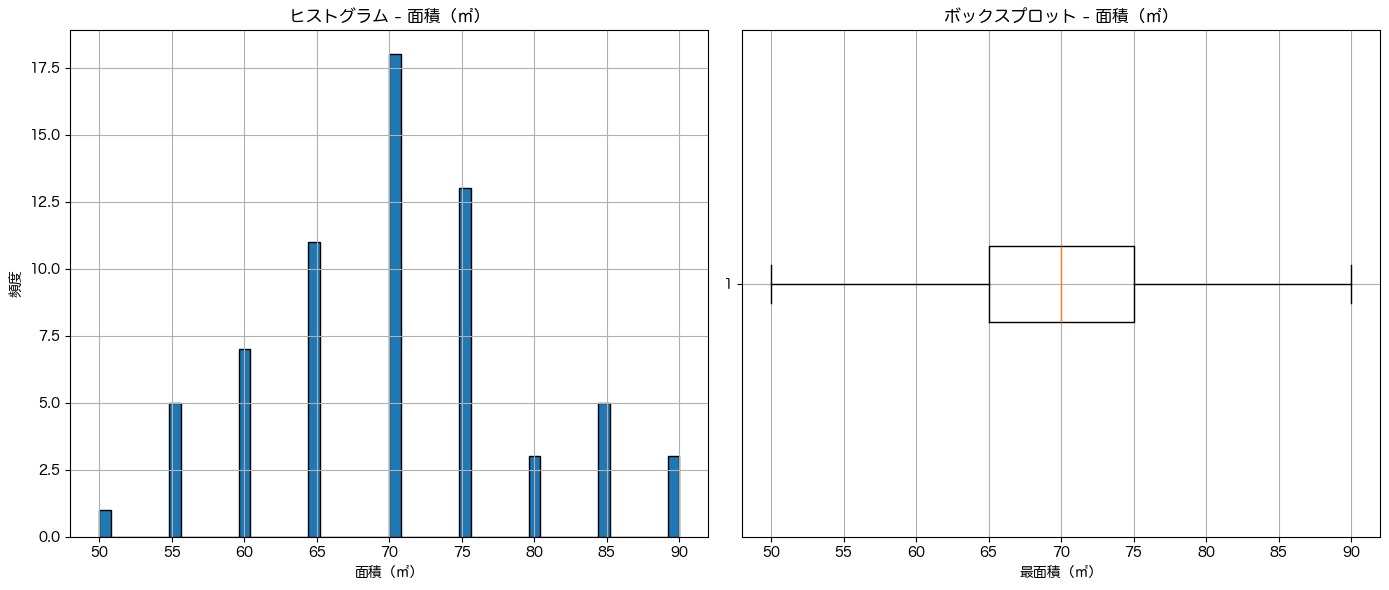


データの行数: 66
データの列数: 8


In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/test/test_cleaned3/test_33_cleaned_最寄駅.csv'
data_cleaned = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

print(data_cleaned.dtypes)

# データの行数と列数をプリントする
print(f"\nデータの行数: {data_cleaned.shape[0]}")
print(f"データの列数: {data_cleaned.shape[1]}")

# 列を数値型に変換（エラーを無視）
data_cleaned['面積（㎡）'] = pd.to_numeric(data_cleaned['面積（㎡）'], errors='coerce')

# 異常値の下限と上限を設定
lower_bound = 50 # 提案された下限
upper_bound = 90 # 提案された上限

# 異常値をNaNに置き換え
data_cleaned['面積（㎡）'] = np.where(
    (data_cleaned['面積（㎡）'] < lower_bound) | (data_cleaned['面積（㎡）'] > upper_bound),
    np.nan,
    data_cleaned['面積（㎡）']
)

# 異常値をNaNに置き換えた後の行数と列数をプリントする
print(f"\n異常値をNaNに置き換えた後のデータの行数: {data_cleaned.shape[0]}")
print(f"異常値をNaNに置き換えた後のデータの列数: {data_cleaned.shape[1]}")

# 異常値を含む行の補完（中央値で補完）
median_value = data_cleaned['面積（㎡）'].median()
data_cleaned['面積（㎡）'].fillna(median_value, inplace=True)

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/data/test/test_cleaned3'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 異常値処理後のデータを保存
data_cleaned_path = os.path.join(save_dir, 'test_33_cleaned_最寄駅_面積（㎡）.csv')
data_cleaned.to_csv(data_cleaned_path, index=False)

# 異常値処理後のデータの確認
print(f"異常値処理後のデータを保存しました: {data_cleaned_path}")
print(data_cleaned['面積（㎡）'].describe())

# 結果を表示
print(f"異常値の下限: {lower_bound}")
print(f"異常値の上限: {upper_bound}")
print(f"異常値の数: {(data_cleaned['面積（㎡）'].isna()).sum()}")

# ヒストグラムの作成
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['面積（㎡）'], bins=50, edgecolor='k')
plt.title('ヒストグラム - 面積（㎡）')
plt.xlabel('面積（㎡）')
plt.ylabel('頻度')
plt.grid(True)

# ボックスプロットの作成
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['面積（㎡）'], vert=False)
plt.title('ボックスプロット - 面積（㎡）')
plt.xlabel('最面積（㎡）')
plt.grid(True)

# プロットを表示
plt.tight_layout()
plt.show()

# データの行数と列数をプリントする
print(f"\nデータの行数: {data_cleaned.shape[0]}")
print(f"データの列数: {data_cleaned.shape[1]}")


# 異常値を中央値で保管する

count        28.000000
mean     202004.392857
std           1.523624
min      202003.000000
25%      202003.000000
50%      202003.000000
75%      202006.000000
max      202006.000000
Name: 取引時点, dtype: float64
異常値を中央値で補完後のデータを保存しました: /Users/hayakawakazue/Downloads/data/test/test_cleaned3/test_03_cleaned_最寄駅_面積（㎡）_建築年_取引時点.csv


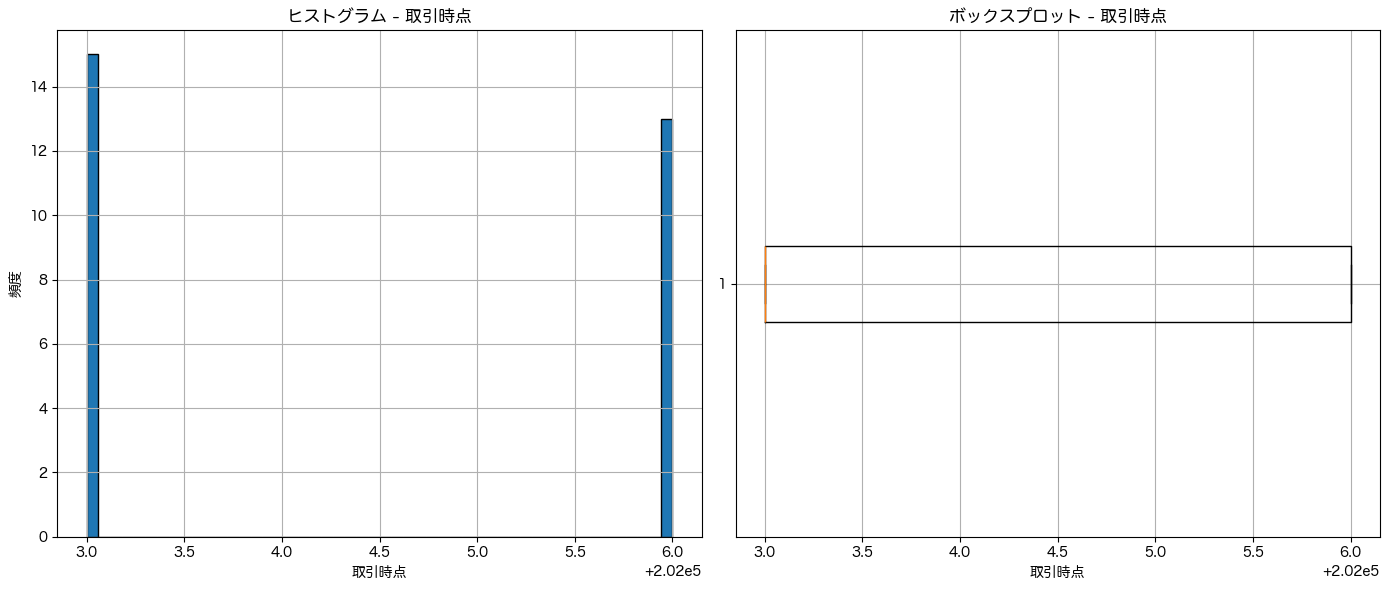


データの行数: 28
データの列数: 8


In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/test/test_cleaned3/test_03_cleaned_最寄駅_面積（㎡）_建築年_取引時点.csv'  # 正しいファイルパスの確認
data_cleaned = pd.read_csv(data_path)

# 最寄駅：距離（分）の異常値の補完
Q1 = data_cleaned['取引時点'].quantile(0.25)
Q3 = data_cleaned['取引時点'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値の検出
outliers = data_cleaned[(data_cleaned['取引時点'] < lower_bound) | (data_cleaned['取引時点'] > upper_bound)]

# 外れ値を中央値で補完
median_value = int(data_cleaned['取引時点'].median())
data_cleaned.loc[data_cleaned['取引時点'] < lower_bound, '取引時点'] = median_value
data_cleaned.loc[data_cleaned['取引時点'] > upper_bound, '取引時点'] = median_value

# 補完後の結果を確認
print(data_cleaned['取引時点'].describe())

# データの保存
data_cleaned_path = '/Users/hayakawakazue/Downloads/data/test/test_cleaned3/test_03_cleaned_最寄駅_面積（㎡）_建築年_取引時点.csv'
data_cleaned.to_csv(data_cleaned_path, index=False)

print(f"異常値を中央値で補完後のデータを保存しました: {data_cleaned_path}")

# ヒストグラムの作成
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['取引時点'], bins=50, edgecolor='k')
plt.title('ヒストグラム - 取引時点')
plt.xlabel('取引時点')
plt.ylabel('頻度')
plt.grid(True)

# ボックスプロットの作成
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['取引時点'], vert=False)
plt.title('ボックスプロット - 取引時点')
plt.xlabel('取引時点')
plt.grid(True)

# プロットを表示
plt.tight_layout()
plt.show()

# データの行数と列数をプリントする
print(f"\nデータの行数: {data_cleaned.shape[0]}")
print(f"データの列数: {data_cleaned.shape[1]}")
